<a href="https://colab.research.google.com/github/abhinao007/Code-tensorflow/blob/main/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
from textblob import TextBlob
import matplotlib.pyplot as plt
from google.colab import files
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation,Embedding,Bidirectional

In [3]:


# Install Kaggle library
!pip install -q kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d alaix14/bitcoin-tweets-20160101-to-20190329


 99% 1.57G/1.58G [00:12<00:00, 101MB/s]
100% 1.58G/1.58G [00:12<00:00, 133MB/s]


In [7]:

from zipfile import ZipFile

file_name = "bitcoin-tweets-20160101-to-20190329.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("done")

done


In [8]:
import pandas as pd
df = pd.read_csv('tweets.csv', sep=';',nrows=20000)

In [9]:
#predit the language to filter for English 
!pip install whatthelang
from whatthelang import WhatTheLang

wtl = WhatTheLang()
L=[]
for row in df['text']:
    if len(row)!=0:
        L.append(wtl.predict_lang(row))
    else:
        L.append(None)
        
df['lang'] = L
df.head()
df = df[df["lang"] == 'en']

     |████████████████████████████████| 788kB 5.1MB/s 
     |████████████████████████████████| 460kB 14.9MB/s 
     |████████████████████████████████| 245kB 17.8MB/s 
  Created wheel for whatthelang: filename=whatthelang-1.0.1-cp37-none-any.whl size=789821 sha256=c9f7a1c2eeb5236aee6b8f98a43c248f362300ed476d3e5a06f8a10810a470ca
  Stored in directory: /root/.cache/pip/wheels/54/ec/de/379ea04fcc427c46fe3ecd21a5041875fcb41bbd81062abba5
  Created wheel for cysignals: filename=cysignals-1.10.3-cp37-cp37m-linux_x86_64.whl size=706042 sha256=755479240ff88b50111d0fd41987b26e698327e09a6cfcd922392268ba6007e8
  Stored in directory: /root/.cache/pip/wheels/1d/de/c9/22c3a5adc6ff0dd19904d4cab0677410e53f4fdd42188ae123
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp37-cp37m-linux_x86_64.whl size=1460774 sha256=27b102d7c9f30cc501ddd093f6c97b173525d135d74fd3d23063393b687eef3d
  Stored in directory: /root/.cache/pip/wheels/25/de/c6/3d26a304c069689a7bf5ef2cc774588663700c8381dbf3d947
Successful

In [10]:
#upload files for Bitcoin trading

uploaded = files.upload()

Saving BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv to BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv


In [11]:
df_btc = pd.read_csv("BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv")
df_btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [12]:
df_btc["Date_Time"]=pd.to_datetime(df_btc["Date"], format='%Y%m%d', errors='ignore')

In [13]:
df_btc['Date_Time']= pd.to_datetime(df_btc['Date'])
df_btc.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Date_Time
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349,2013-10-01
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383,2013-10-02
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833,2013-10-03
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816,2013-10-04
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566,2013-10-05


In [14]:
df['Date_Time']= pd.to_datetime(df['timestamp'], format='%Y-%m-%d')

df['Date_Time']= pd.to_datetime(df['Date_Time']).dt.date
df['Date_Time']= pd.to_datetime(df['Date_Time'])
df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...,en,2019-05-27
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...,en,2019-05-27
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,en,2019-05-27
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,en,2019-05-27
6,1132977101638897665,evilrobotted,evilrobotted,NaN,2019-05-27 11:49:25+00,0,0,0,@nwoodfine We have been building on the real #...,en,2019-05-27


In [15]:
!pip install nltk
!pip install re

import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = ' '.join(text.split('.'))
    text = re.sub('\/',' ',text)
    text = text.strip('\'"')
    text = re.sub(r'@([^\s]+)',r'\1',text)
    text = re.sub(r'\\',' ',text)
    text = text.lower()
    text = re.sub('[\s]+', ' ', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    text = re.sub(r'((http)\S+)','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
    text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)

df['text'] = df['text'].apply(lambda text: text_cleaning(text))
df.sample(3)

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time
10058,1126846443568947201,Social_Tweetx,Shair Afzal,NaN,2019-05-10 11:48:22+00,0,0,0,earn crypto token listening music join cyfm co...,en,2019-05-10
16592,1126871300973178882,mfoupouendoun,MFOUPOUENDOUN JERMIE,NaN,2019-05-10 13:27:09+00,0,0,0,bitcoin black v bitcoin get free coins value c...,en,2019-05-10
19251,1126880453036843008,jamesburrell2,James Burrell II 🔑,NaN,2019-05-10 17:21:32+00,0,2,1,bitcoindood dummies worried bitcoin worried ch...,en,2019-05-10


In [16]:
df_j = pd.merge(df, df_btc, how='left', on = 'Date_Time')

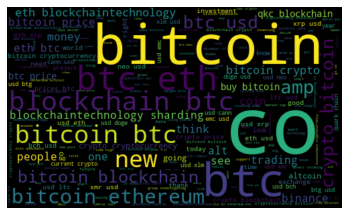

In [17]:
# all the words wordcloud
!pip install wordcloud
from wordcloud import WordCloud
allTheWords=" ".join( [twts for twts in df_j['text']])
wordCloud =WordCloud(width = 500, height = 300 , random_state = 21, max_font_size = 119).generate(allTheWords)
plt.imshow(wordCloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [18]:
from textblob import TextBlob

def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity


df_j['polarity'] = df_j['text'].apply(lambda txt: getPolarity(txt))      # new column of sentiment
df_j['Subjectivity'] = df_j['text'].apply(lambda txt: getSubjectivity(txt))  

df_j.sample(10)

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),polarity,Subjectivity
7215,1126843289284554752,echarkov,eugene charkov,NaN,2019-05-10 11:35:50+00,0,0,0,spx ndx es f tsla btc qqq resistance es stays ...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.0000,0.000
7300,1126843705359568896,MRZ1W3le6361,NEHİR İLİK,NaN,2019-05-10 11:37:29+00,0,0,0,xblock blockchain crypto ether ethereum bitcoi...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.0000,0.000
1242,1132981279702568961,DanyaLukov,Даниил Луков,NaN,2019-05-27 12:06:01+00,0,0,0,bulletin en looks like btc starting grow found...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.2000,0.450
13489,1126872046497984512,BitcoinEdu,Bitcoin EDU,NaN,2019-05-10 13:30:06+00,0,0,0,emergent market businesses bitcoin world finan...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.0000,0.000
7876,1126618635345252352,1980SteveH36,S1980⚡️,NaN,2019-05-11 13:00:55+00,8,70,9,people fomo xrp btc financial advise warned bi...,en,2019-05-11,BTC,2019-05-11,7254.805536,6347.706737,7337.322181,6346.331889,0.0000,0.000
10672,1126859790863351808,Adrian_Xt,Adrian X,NaN,2019-05-10 12:41:24+00,0,0,0,arminvanbitcoin zbingledack mskieller madinmel...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.1125,0.525
13131,1126651569661972482,gurugarzah,Guru^garzaH,NaN,2019-05-10 13:25:45+00,0,18,7,thecryptodog brad sherman bitcoin guys pajamas...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.3750,0.750
224,1132977917133295616,coinspectator,Coin Spectator - Real-time cryptocurrency news,NaN,2019-05-27 11:52:39+00,0,0,0,situation complicates cryptopia arizona demand...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0000,0.000
13872,1126874420776095744,kayaponpon,kapo,NaN,2019-05-10 13:39:32+00,0,0,0,want buy bitcoin account current price send dm...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.0000,0.400
4299,1126830255010828288,Criptomonedaico,Criptomonedaseico,NaN,2019-05-10 10:44:02+00,0,0,0,millones binance crooks shuffle carteras crypt...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.0000,0.000


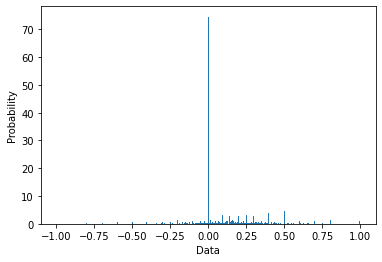

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(df_j['polarity'], density=True, bins=300)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');


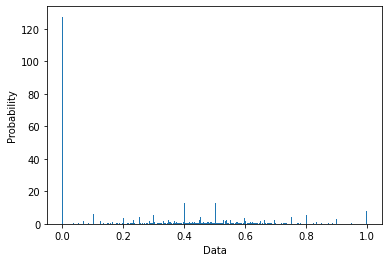

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(df_j['Subjectivity'], density=True, bins=300)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');


In [21]:

# Bucket the score 

def getAnalysis(Score):
  if Score < 0 :
    return "Negative"
  elif Score >0:
    return "Positive"
  else:
     return "Neutral"

df_j["polarity_bkt "] = df_j["polarity"].apply(getAnalysis)


In [23]:
Index(['id', 'user', 'fullname', 'url', 'timestamp', 'replies', 'likes',
       'retweets', 'text', 'lang', 'Date_Time', 'Currency', 'Date',
       'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)', 'polarity', 'Subjectivity', 'polarity_bkt '],
      dtype='object')

Index(['id', 'user', 'fullname', 'url', 'timestamp', 'replies', 'likes',
       'retweets', 'text', 'lang', 'Date_Time', 'Currency', 'Date',
       'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)', 'polarity', 'Subjectivity', 'polarity_bkt '],
      dtype='object')

In [29]:
df_j["PercentageChange"]= (df_j['Closing Price (USD)']- df_j['24h Open (USD)'] )*100/df_j['24h Open (USD)'] 


df_j.head()


,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),polarity,Subjectivity,polarity_bkt,PercentageChange
0,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,cardano digitize currencies eos co ktkqkebls r...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.00,Neutral,1.701054
1,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,another test tweet caught stream bitcoin,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.00,Neutral,1.701054
2,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,current crypto prices btc usd eth usd ltc usd ...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.40,Neutral,1.701054
3,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,spiv nosar baz bitcoin asset amp currency co f...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.0,0.00,Neutral,1.701054
4,1132977101638897665,evilrobotted,evilrobotted,NaN,2019-05-27 11:49:25+00,0,0,0,nwoodfine building real bitcoin sv building br...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,-0.1,0.35,Negative,1.701054


In [61]:
from numpy.random import RandomState

rng = RandomState()
train_data = df_j.sample(frac=0.8, random_state=rng)
test_data = df_j.loc[~df_j.index.isin(train_data.index)]

La taille des données d entrinement: 12796
La taille des données de test: 3199


In [77]:
max_features = 20000  # Only consider the top 20k words
maxlen = 200

In [66]:
train_data['flag'] = 'TRAIN'
test_data['flag'] = 'TEST'


total_docs = pd.concat([train_data,test_data],axis = 0,ignore_index = True)
phrases = total_docs['text'].tolist()

total_docs.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),sentiment,flag
5108,1126855830219845632,CharlieIsBig,Charlie Browner,NaN,2019-05-10 12:25:40+00,0,0,0,justinsuntron binance cz binance hero give btc...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.500000,TRAIN
10734,1126861571899252738,wanderingsadhak,the wandering sadhaka,NaN,2019-05-10 12:48:29+00,0,0,0,possible ban btc bitcoin congress rep sherman ...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,-0.050000,TRAIN
2328,1126830542073286656,BruceDayne,Khareem Sudlow,NaN,2019-05-10 10:45:11+00,0,0,0,cryptocurrency btcnews binance co ahyq kbo jpm...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.000000,TRAIN
5604,1116850088347746305,AfricanCoinExch,African Coin Exchange,NaN,2019-04-12 23:46:25+00,0,65,55,africancoinexchange cryptocurrency buybtc cryp...,en,2019-04-12,BTC,2019-04-12,5077.515864,5042.402341,5098.606039,4894.733180,0.000000,TRAIN
12779,1126860842702602240,deYummyEvents,deYummy Events,NaN,2019-05-10 12:45:35+00,0,0,0,latest deyummy sexsational events co ctciugibc...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.350000,TRAIN
15630,1126875252380897280,PrettyHatMech,🄿🅁🄴🅃🅃🅈 🄷🄰🅃 🄼🄰🄲🄷🄸🄽🄴,NaN,2019-05-10 13:42:51+00,0,0,0,khaleesi rises rationalwiki use paypal going s...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.000000,TEST
860,1126842347336105984,KevinEllah1,Kevin,NaN,2019-05-10 11:32:05+00,0,0,0,fidelity stick top cryptos like bitcoin xrp sa...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.500000,TRAIN
8646,1126859813617410049,SusantiNuris,nuris susanti,NaN,2019-05-10 12:41:30+00,0,0,0,win pxb amp btc sign awesome contest co pl jnb...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.658333,TRAIN
9646,1126869022744563712,MercadosBitcoin,Mercados ฿itcoin,NaN,2019-05-10 13:18:05+00,0,0,0,holding back bitcoin venezuela group investiga...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.000000,TRAIN
14634,1126853279009218564,PlanetaryDice,Demogorgon,NaN,2019-05-10 12:15:32+00,0,0,0,marvinchebbi thecryptomonk scrolling elf power...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.400000,TEST


In [76]:
from keras.preprocessing.text import one_hot
vocab_size = 50000
encoded_phrases = [one_hot(d, vocab_size) for d in phrases]
total_docs['Phrase'] = encoded_phrases
train_data = total_docs[total_docs['flag'] == 'TRAIN']
test_data = total_docs[total_docs['flag'] == 'TEST']
x_train = train_data['Phrase']
y_train = train_data['sentiment']
x_val = test_data['Phrase']
y_val = test_data['sentiment']

In [78]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [79]:
model = Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")

# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(50000, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))

# Add a classifier
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          1600000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,616,673
Trainable params: 1,616,673
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=20, 
          validation_data=(x_val, y_val),
          validation_steps=20)

Epoch 1/20
100/100 [==============================] - 49s 280ms/step - loss: 0.3659 - accuracy: 0.4874 - val_loss: 0.2566 - val_accuracy: 0.4945
Epoch 2/20
100/100 [==============================] - 27s 269ms/step - loss: 0.1991 - accuracy: 0.4981 - val_loss: 0.1502 - val_accuracy: 0.4949
Epoch 3/20
100/100 [==============================] - 27s 265ms/step - loss: 0.0762 - accuracy: 0.4989 - val_loss: 0.0980 - val_accuracy: 0.4953
Epoch 4/20
100/100 [==============================] - 27s 267ms/step - loss: 0.0460 - accuracy: 0.4984 - val_loss: 0.6406 - val_accuracy: 0.4945
Epoch 5/20
100/100 [==============================] - 27s 267ms/step - loss: 0.2743 - accuracy: 0.4951 - val_loss: 0.0378 - val_accuracy: 0.4957
Epoch 6/20
100/100 [==============================] - 27s 268ms/step - loss: -0.0982 - accuracy: 0.4989 - val_loss: -0.0140 - val_accuracy: 0.4957
Epoch 7/20
100/100 [==============================] - 27s 267ms/step - loss: -0.1871 - accuracy: 0.5029 - val_loss: -0.0707 - va

In [81]:
test_loss, test_acc = model.evaluate(x=x_val, y=y_val)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

sample_text = ('Bitcoin just lost half its value overnight. Sorry all you savvy investors ')
vocab_size = 50000

model.predict(one_hot(sample_text, vocab_size))

100/100 [==============================] - 4s 36ms/step - loss: -0.6237 - accuracy: 0.4986
Test Loss: -0.623680591583252
Test Accuracy: 0.4985933005809784


array([[1.0762587e-01],
       [1.8603727e-01],
       [1.5957099e-01],
       [1.1550453e-09],
       [2.2997433e-01],
       [6.8857670e-02],
       [1.8781424e-03],
       [4.6504616e-11],
       [1.3946167e-01],
       [1.8456548e-02],
       [5.9124231e-03],
       [1.7454177e-02]], dtype=float32)

In [4]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
